# MINIMAL SCAFFOLD
## Introduction

This jupyter notebook contains an overview of the software package, which highlights the main features and functions. The present library's objectives are as follows:
-  To provide an implementation of the Shortest Homology Basis algorithm introduced in __[*Dey, Li, Wang: Efficient algorithms for computing a minimal homology basis. (2018)*](https://doi.org/10.1007/978-3-319-77404-6_28)__
-  To employ the shortest homology basis to construct the Minimal Homological Scaffold (to appear)
-  To compare the minimal scaffold to the original homological scaffold, defined in __[*Petri, Expert, Turkheimer, Carhart-Harris, Nutt, Hellyer, Vaccarino: Homological scaffolds of brain functional networks. (2014)*](https://doi.org/10.1098/rsif.2014.0873)__. To this end, it incorporates the original python2 library Holes, which depends on jython and JavaPlex. Notice that, however, in order to experiment with the minimal scaffold these are not required. A full account of the dependencies is given below and in the main Readme file.

### Hypotheses
The present library works by taking as input a graph with non-negative weights $G$, represented by an adjacency matrix $W$. It constructs the filtration of simplicial complexes $(K_\varepsilon)$ induced by the weighting, and for each filtration step $\bar{\varepsilon}$ computes minimal representatives of a basis of $H_1(K_{\bar{\varepsilon}})$. These minimal representatives are used to build the minimal homological scaffold of the input network $MS(W)$.<br><br>
Additionally, it can pass the same input network to the Holes/JavaPlex implementation of the loose homological scaffold defined in *Petri et al. (2014)*, to use for comparison. Package Holes needs to be set up properly (see [Dependencies for Holes](#HolesDependencies)). <br><br>
**Remarks:** Regarding the uniqueness of minimal representatives, see [here](#Draws). Regarding the possibility of running a multithreaded version of the algorithm, see [here](#Parallel). 

## Example Pipeline
In order to showcase the usage of the package, we shall set up the computation of the minimal and loose homological scaffolds of a clique complex built on top of a simple weighted graph.

### Libraries


In [1]:
import sys
sys.path.append('./src') # add the source code to the path

# These are the main files in MinScaffold/src/

import Driver
import Geometry
import Scaffold

# These libraries are used throughout the code

import math
import numpy as np
from random import random
import networkx as nx
import pickle as pk
import matplotlib.pyplot as plt

## A basic example
This introductory script sets up a minimal example of a weighted graph, using functions embedded into the MinScaffold library.
-  *Function* Driver.sampleCircle(params) <br>
     `INPUT: average x coord, average y coord, radius, number of points, noise intensity` <br>
     `OUTPUT: A list of NV points on the plane`
     
-  *Function* Driver.points2adj(params) <br>
    `INPUT: A list of points in the plane` <br>
    `OUTPUT: A tuple of two matrices`

Generate a sample of NV points as input.

In [10]:
NV = 35 # number of vertices

# This generates a sample of NV points, in a noisy circle shape
P = Driver.sampleCircle(0,1,3,NV,3)

# This returns a weighted adjacency matrix for the points. Weights are Euclidean distances.
W,_ = Driver.points2adj(P,4)

### Visualization
We now employ *networkx* to represent matrix W as a graph, and draw it. We use a *layout* object to fix a layout for the nodes; this will be useful later to compare the input to the scaffolds. Passing *pos=layout* to nx.draw will maintain all nodes in the original position.

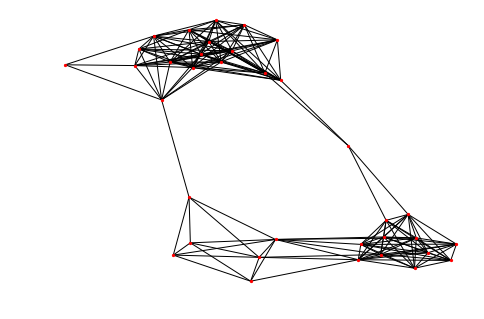

In [11]:
G = nx.Graph(W)
# Fix a layout for graph G. Node positions are chosen trying to minimize edge crossings.
layout = nx.drawing.layout.spring_layout(G)
# Plot the input weighted graph.
nx.draw(G, pos=layout, node_size=5)

We now have a weighted adjacency matrix for a graph represented in the above figure stored in W. Object G contains its networkx representation.

In [12]:
epsList = Geometry.genFullEpsList(W)

In [26]:
monitor_file = './monitor'
F = Driver.getFiltrBasis(W, epsList, Draws=False, parallel=False,monitor=None)

KeyboardInterrupt: 

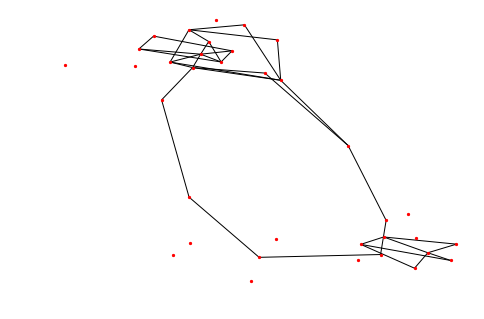

In [15]:
S = Scaffold.frequency_Scaffold(F , NV)

Scaf = nx.from_numpy_matrix(S, parallel_edges=False)
nx.draw(Scaf,pos=layout, node_size=5)

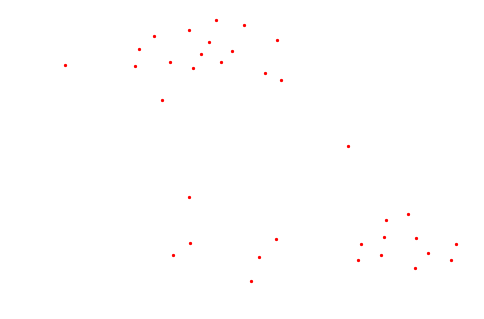

In [16]:
Bas = []
for (e,B) in F.Elements:
    Bas.append(B)

M = Scaffold.matrix_Basis(Bas[150] , NV , np.array(F.get_edgeList()) )
nx.draw( nx.Graph(M) , pos = layout , node_size=5 )

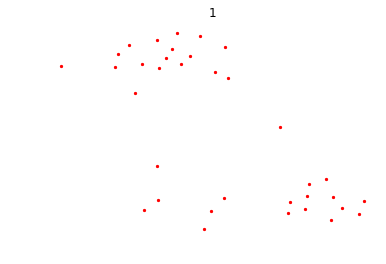

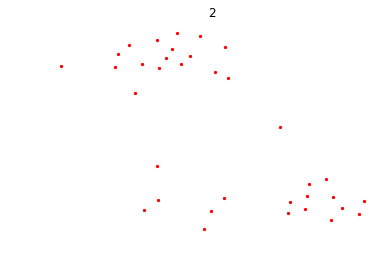

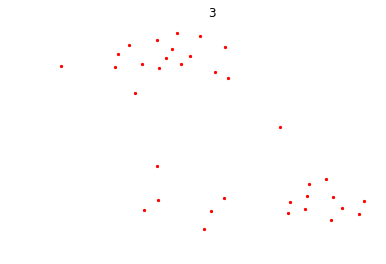

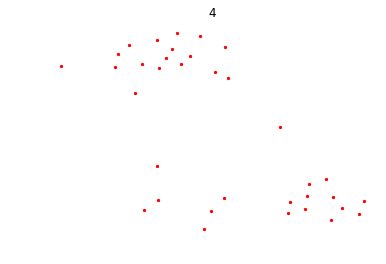

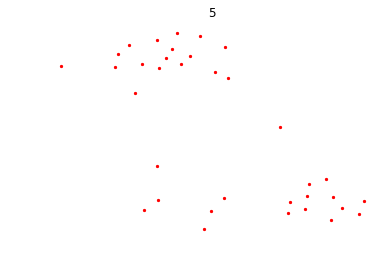

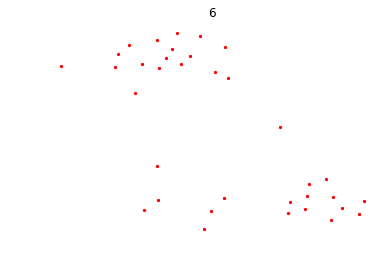

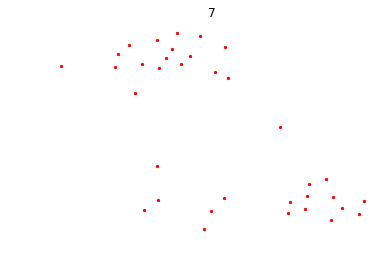

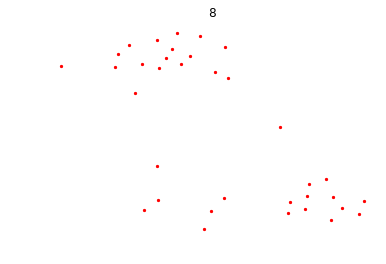

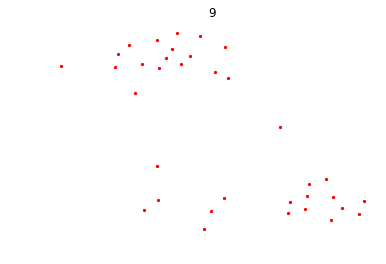

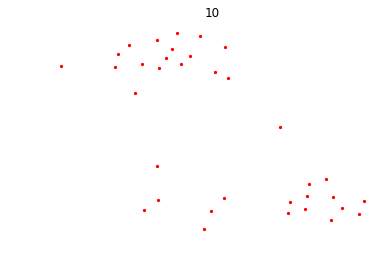

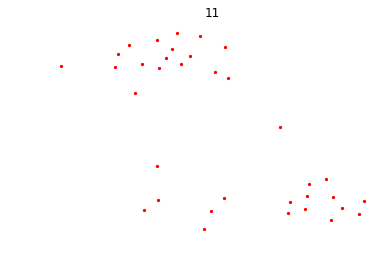

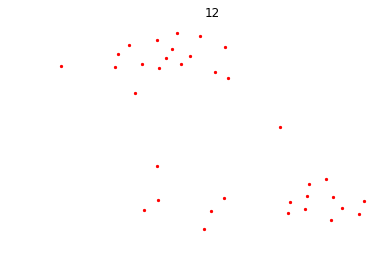

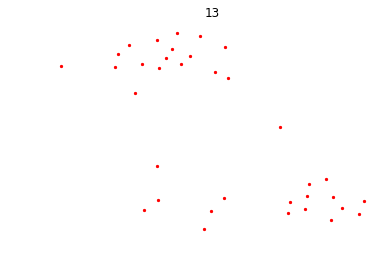

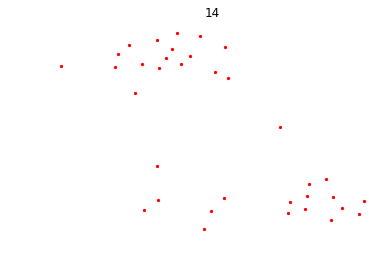

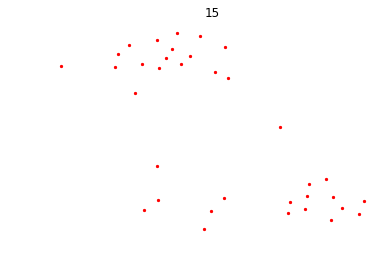

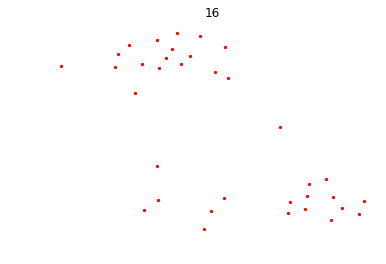

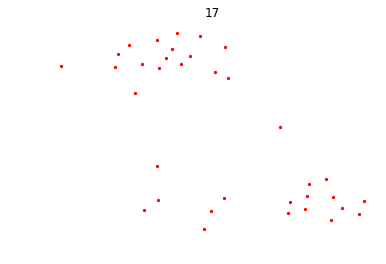

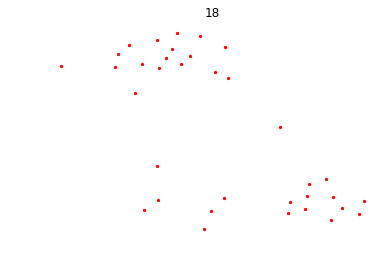

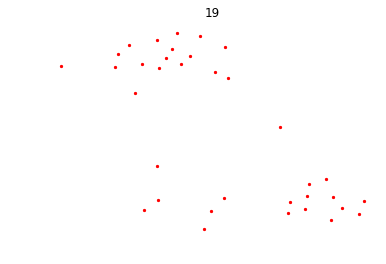

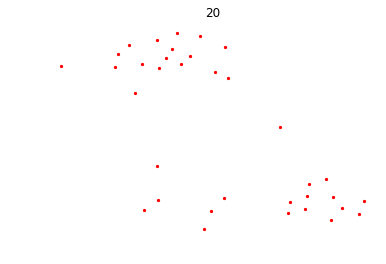

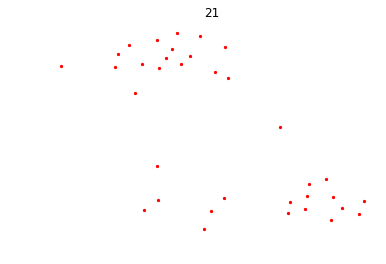

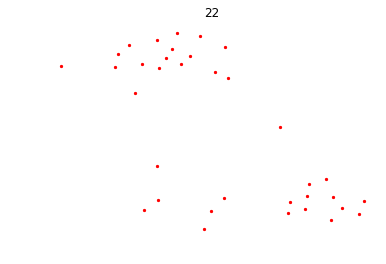

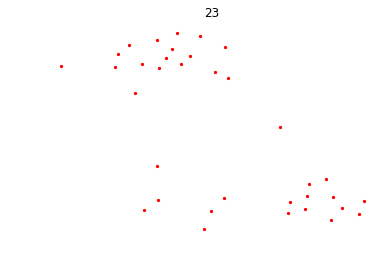

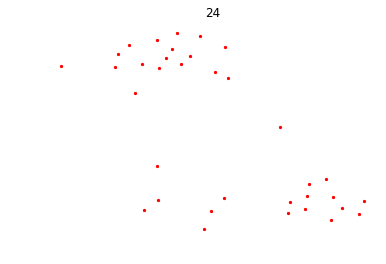

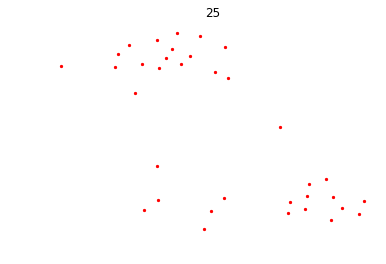

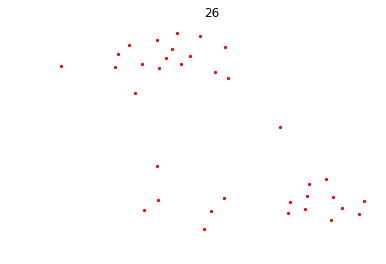

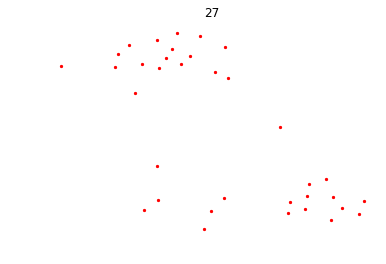

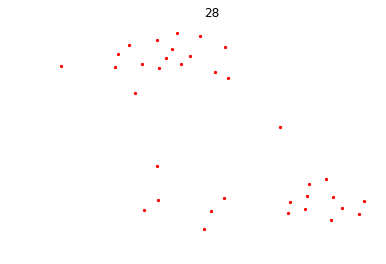

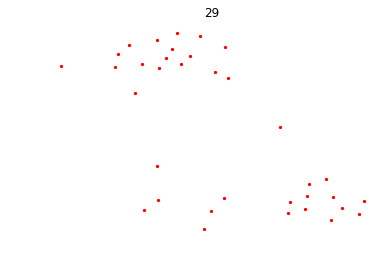

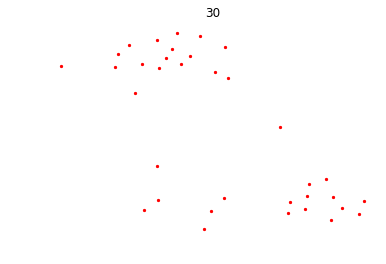

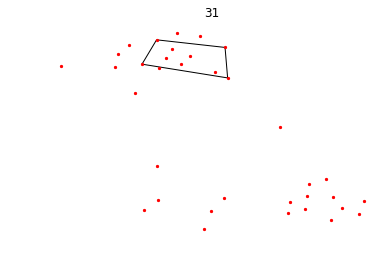

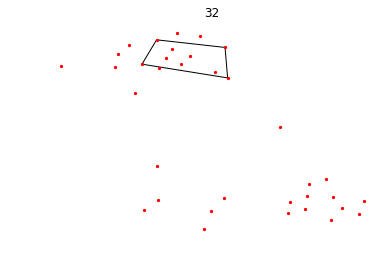

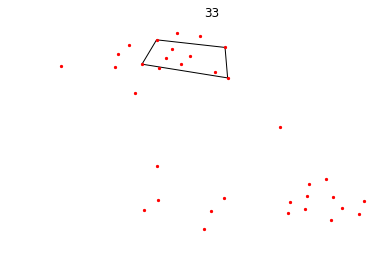

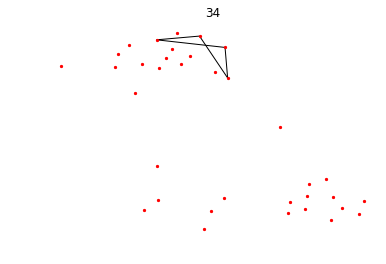

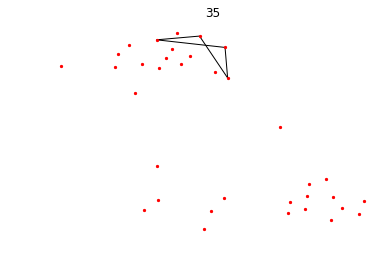

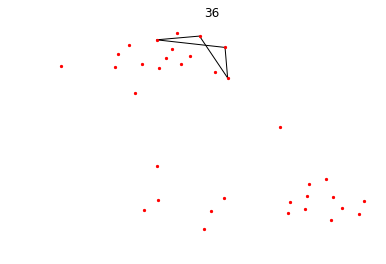

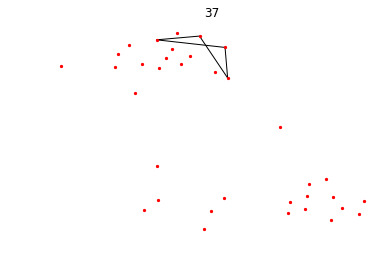

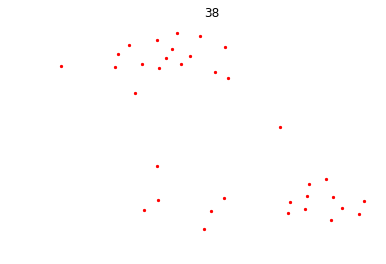

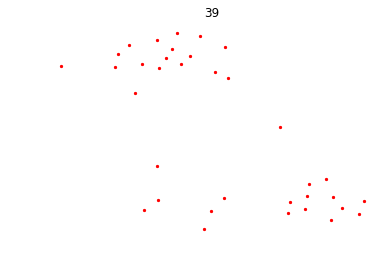

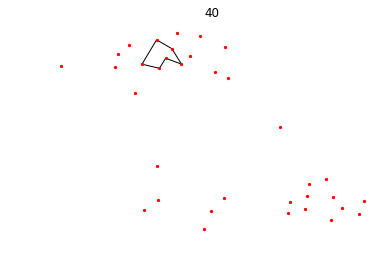

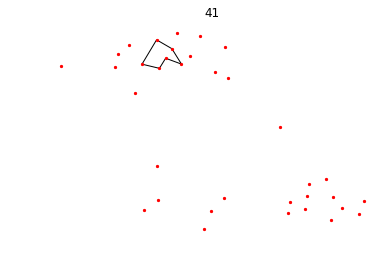

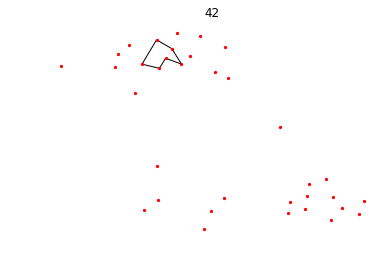

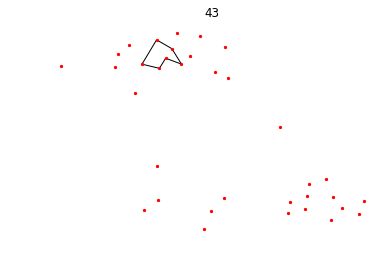

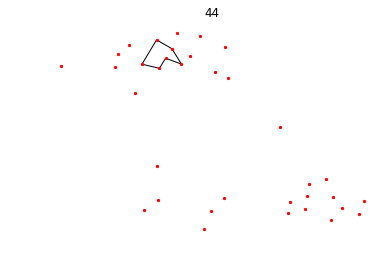

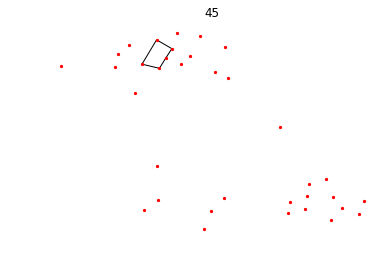

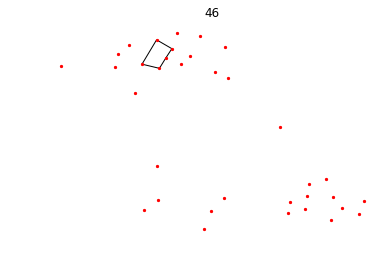

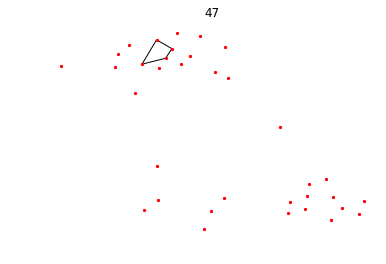

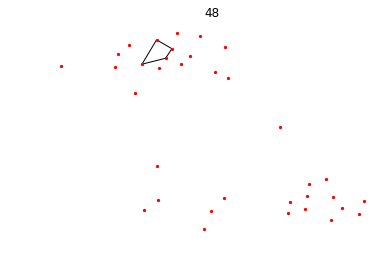

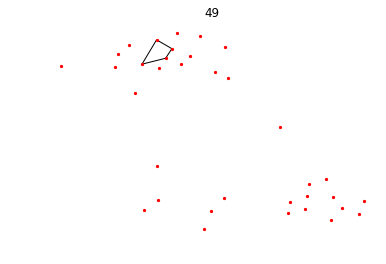

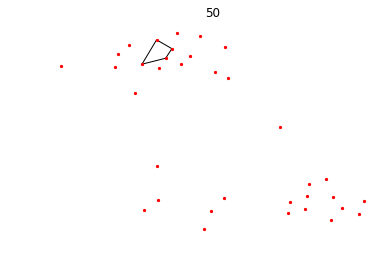

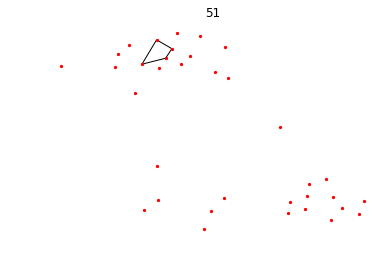

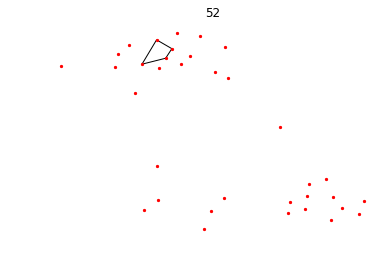

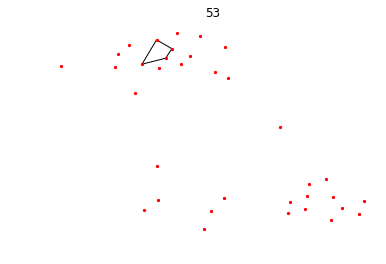

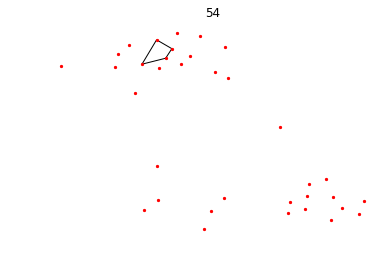

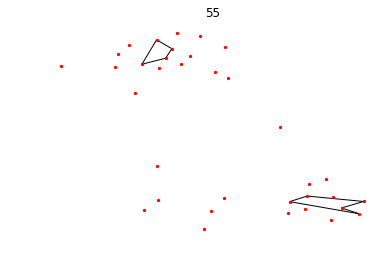

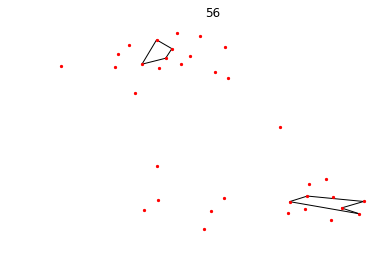

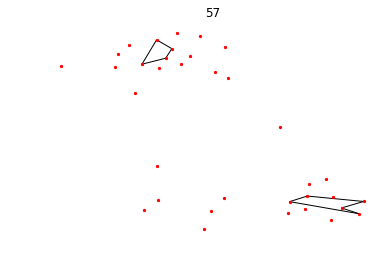

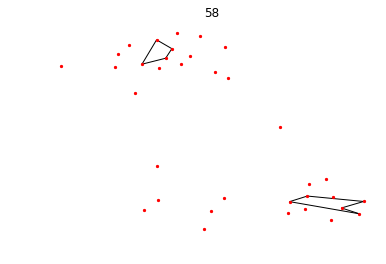

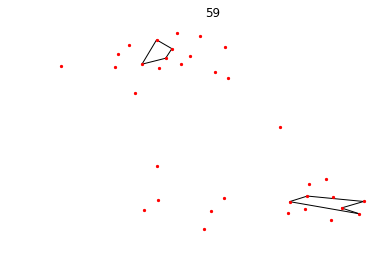

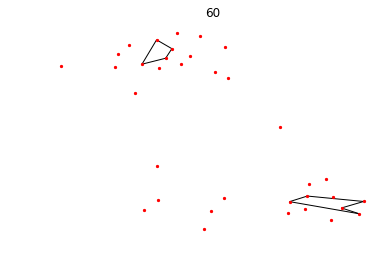

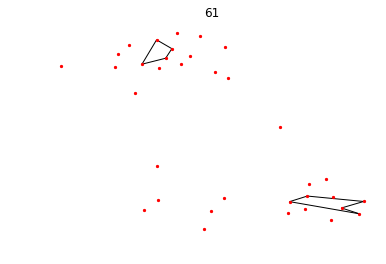

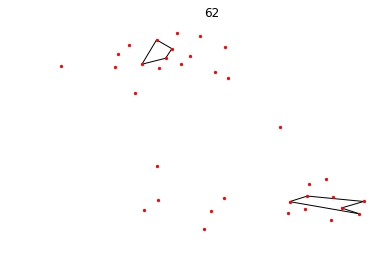

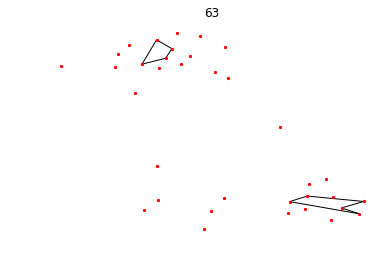

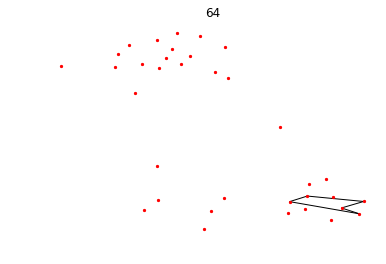

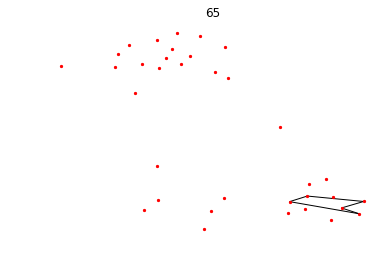

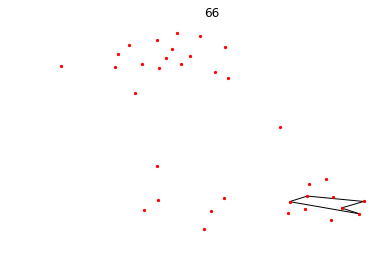

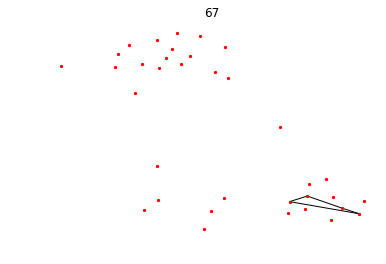

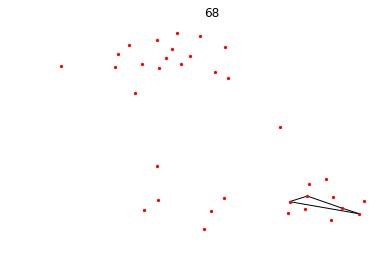

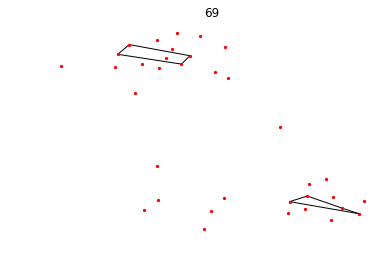

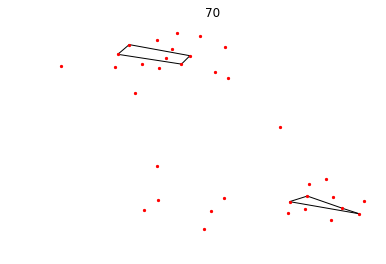

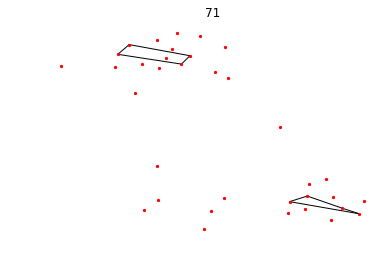

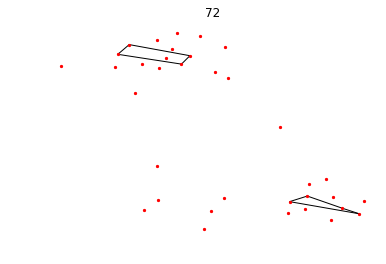

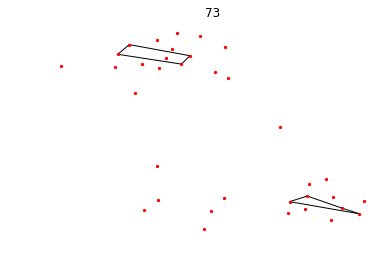

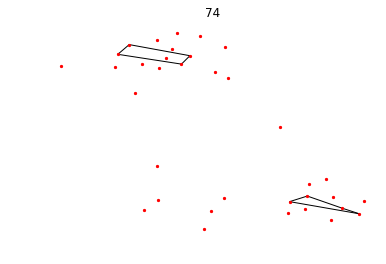

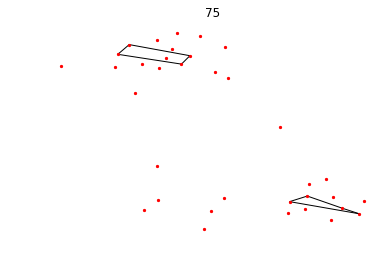

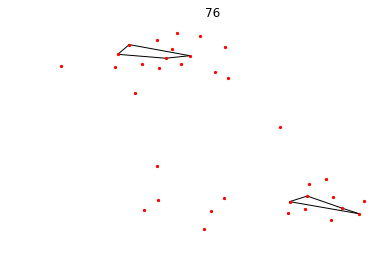

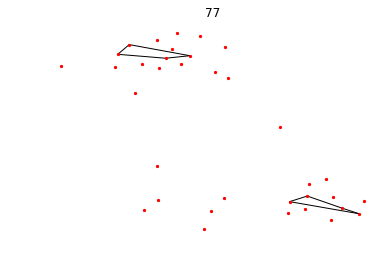

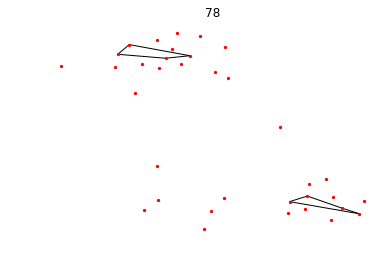

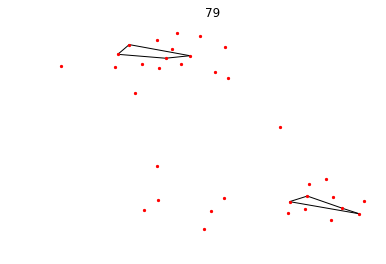

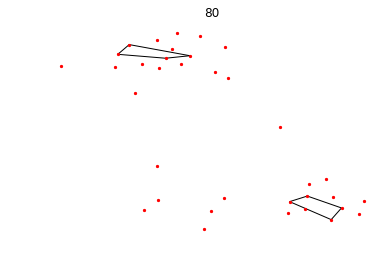

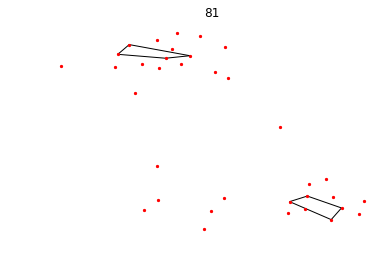

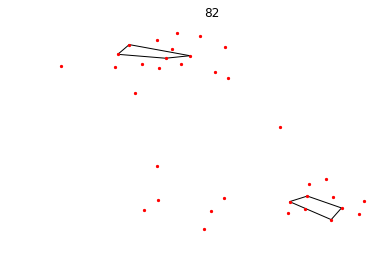

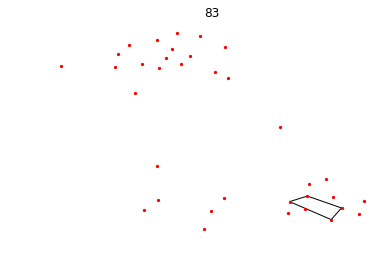

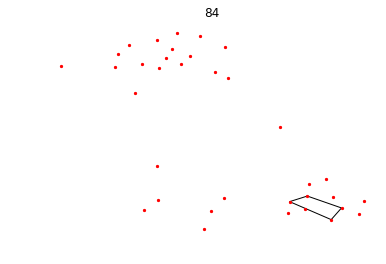

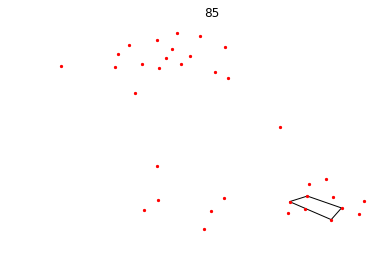

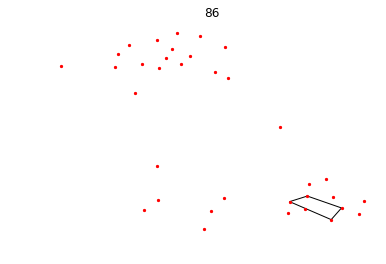

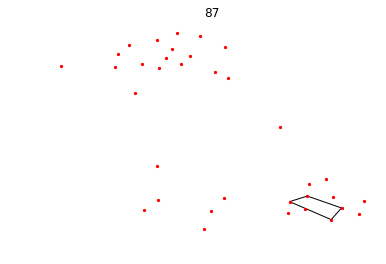

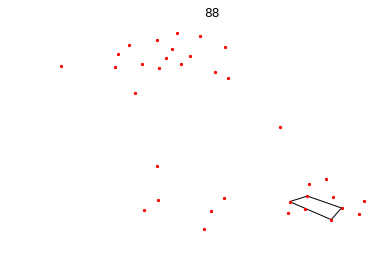

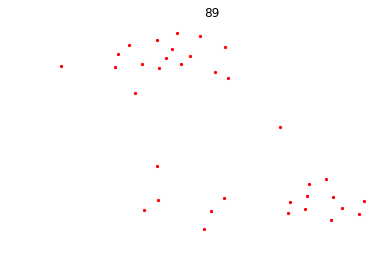

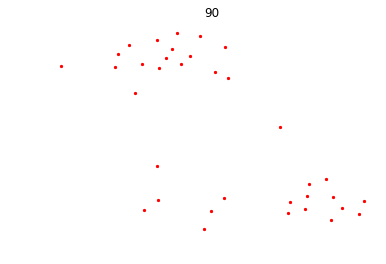

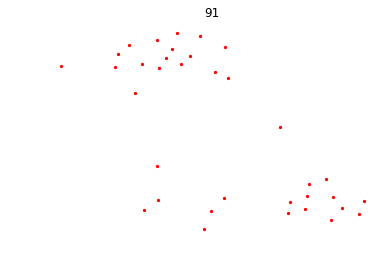

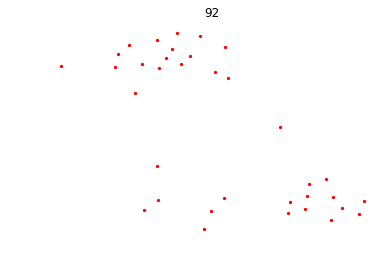

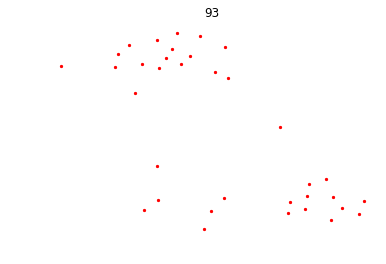

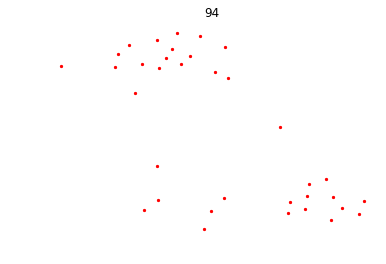

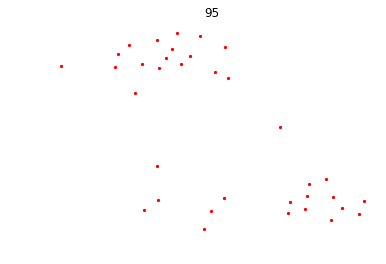

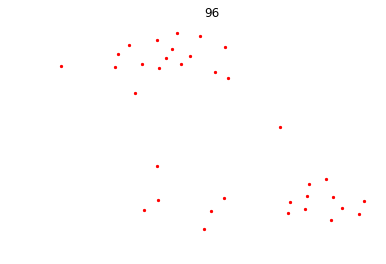

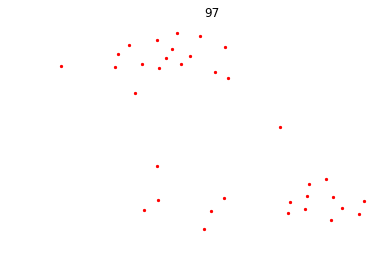

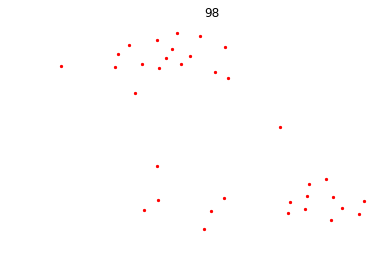

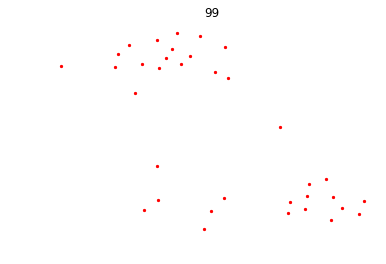

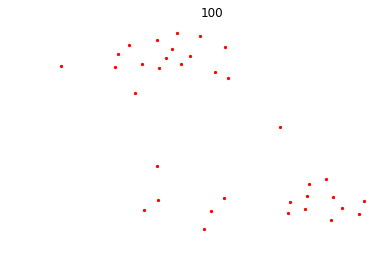

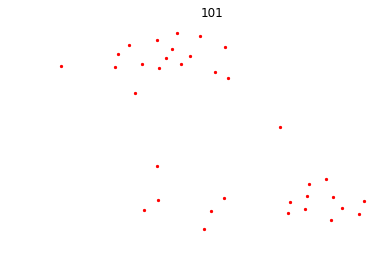

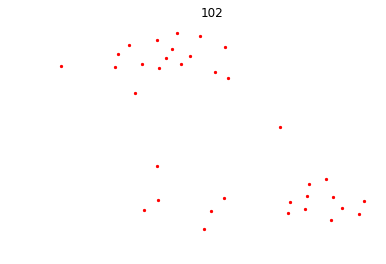

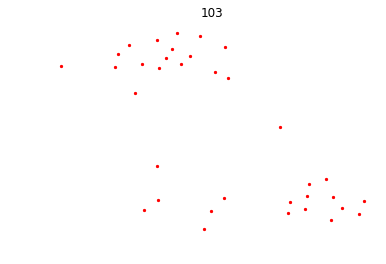

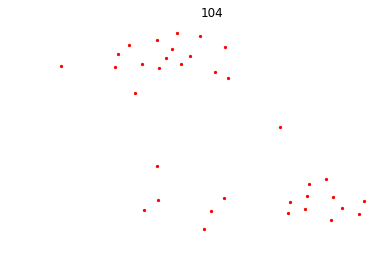

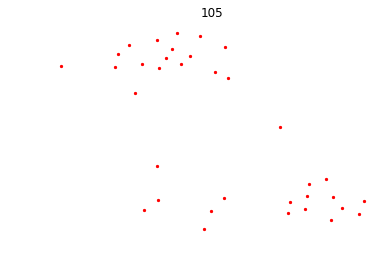

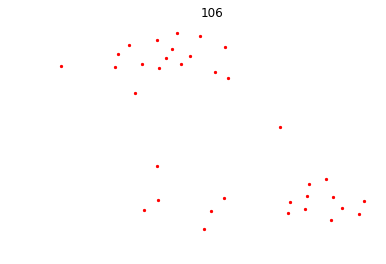

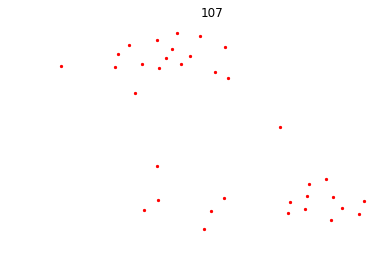

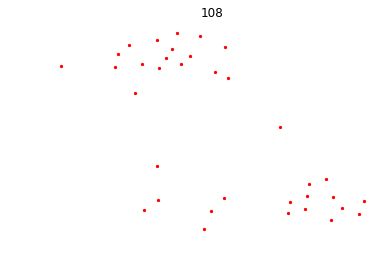

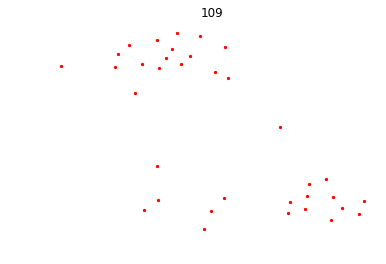

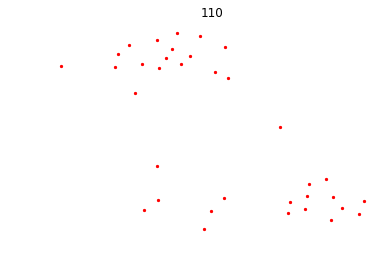

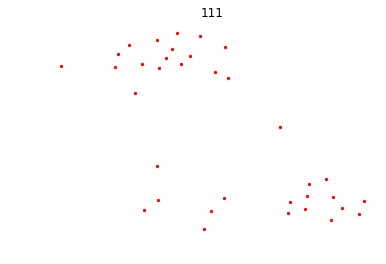

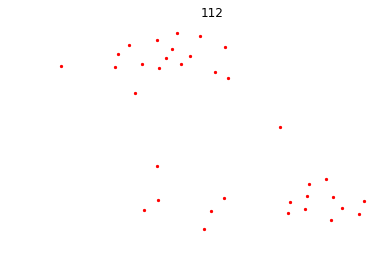

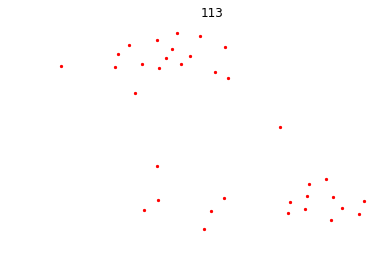

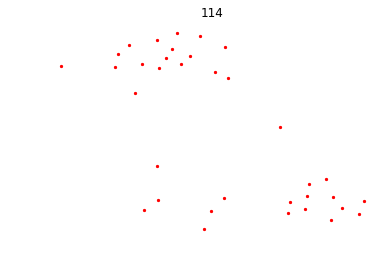

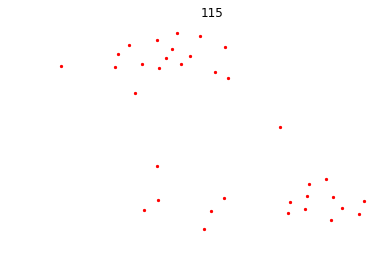

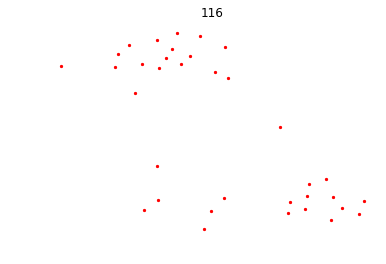

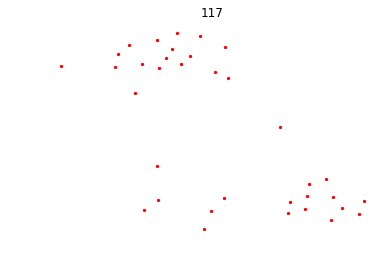

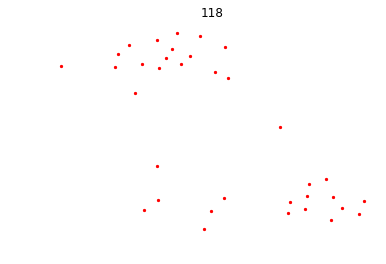

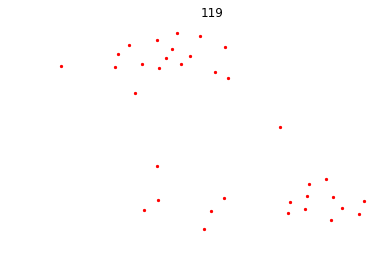

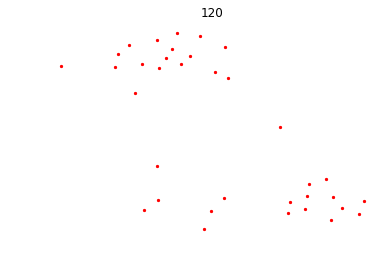

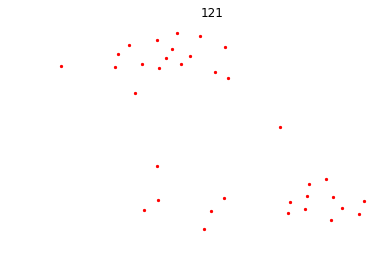

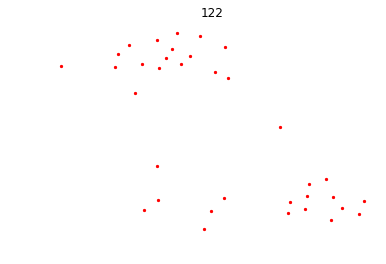

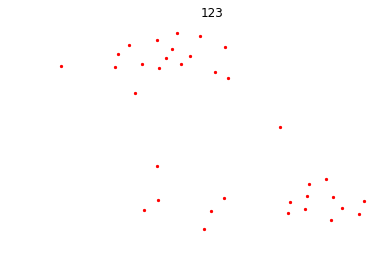

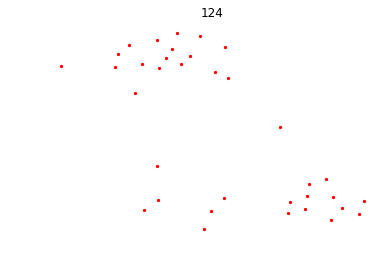

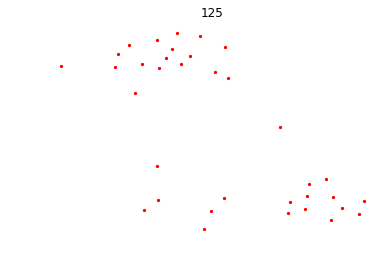

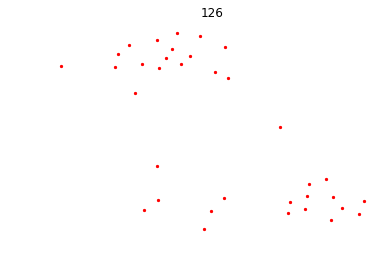

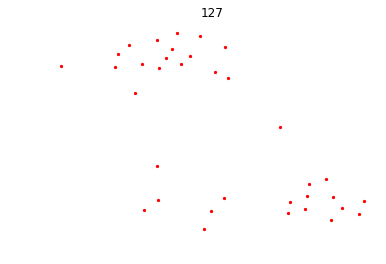

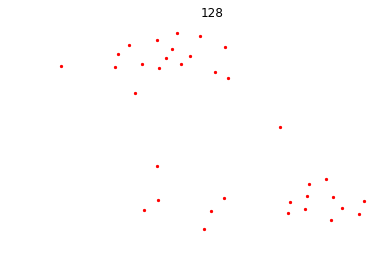

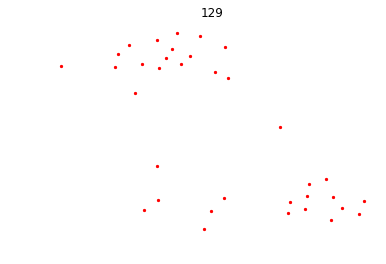

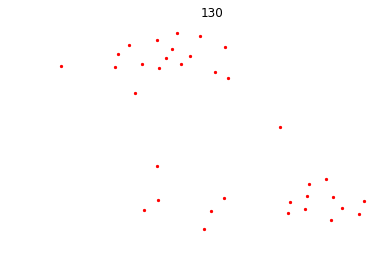

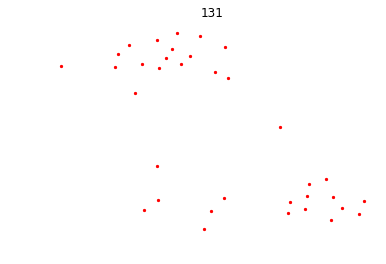

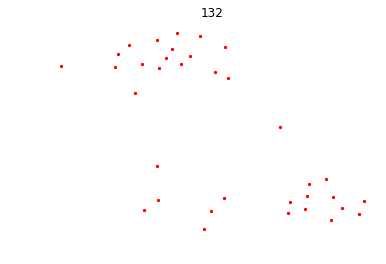

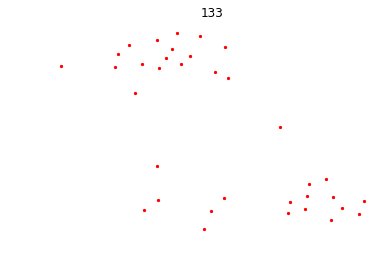

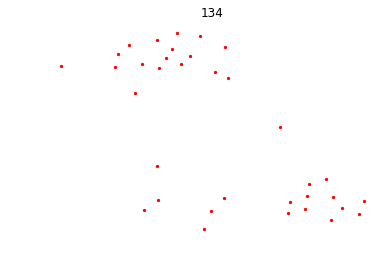

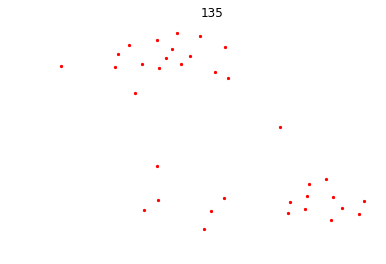

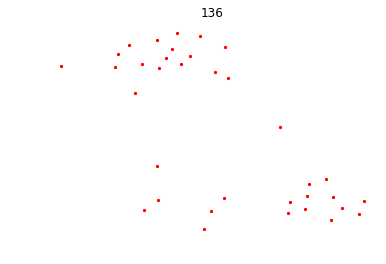

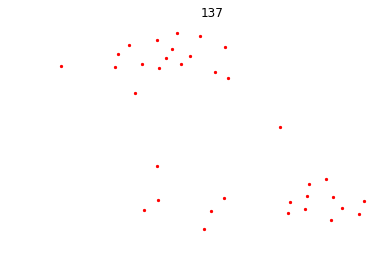

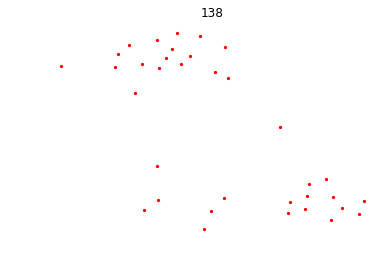

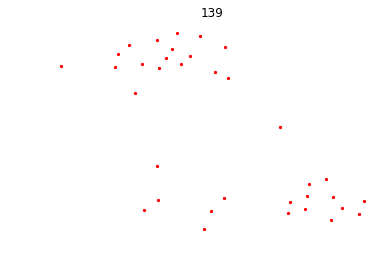

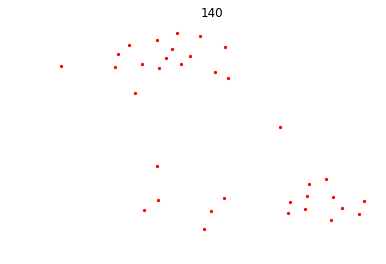

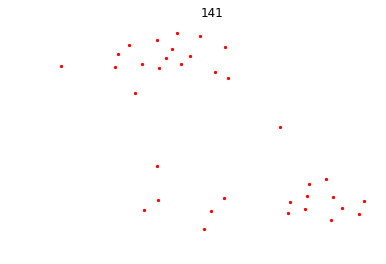

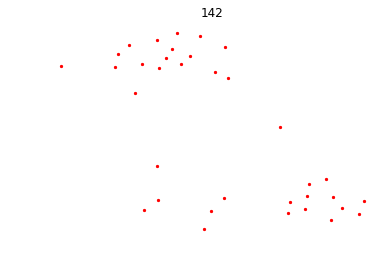

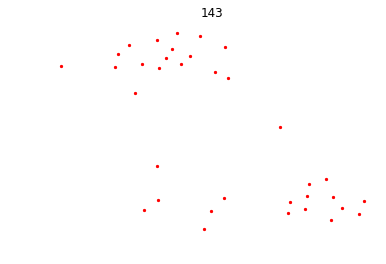

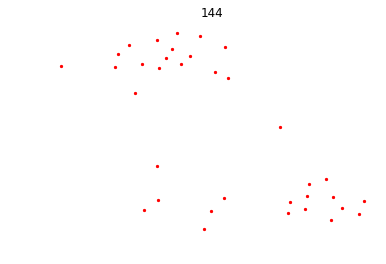

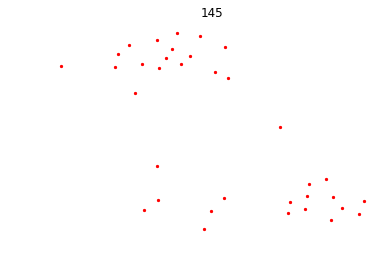

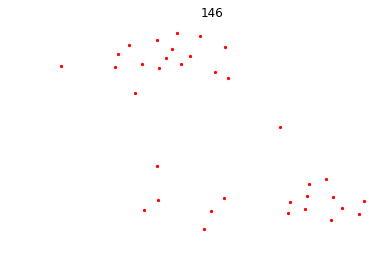

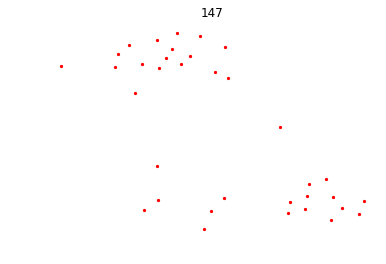

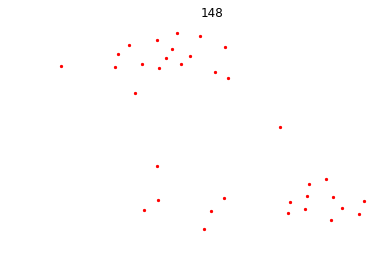

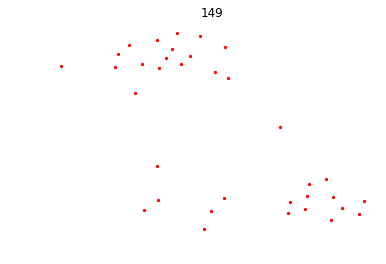

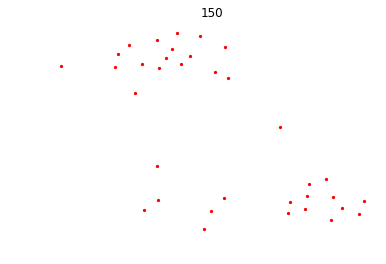

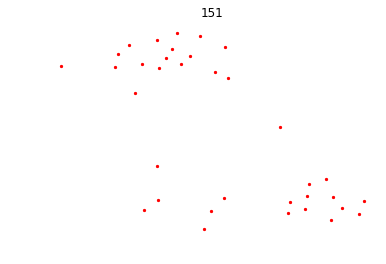

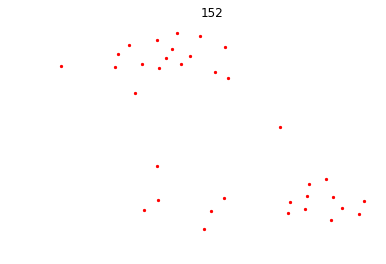

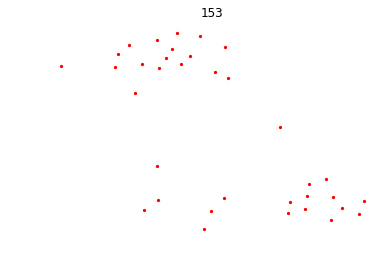

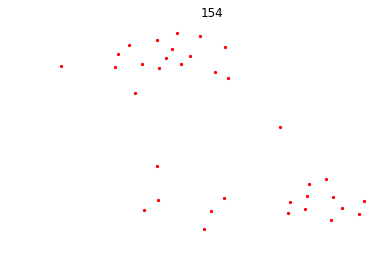

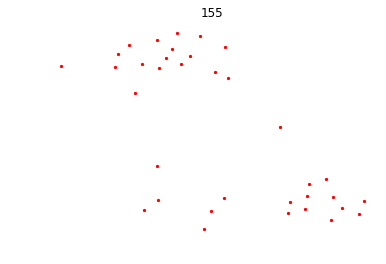

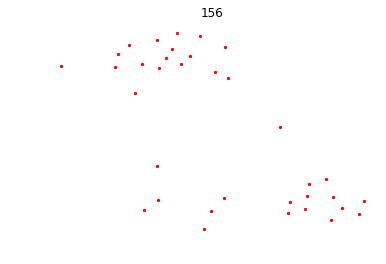

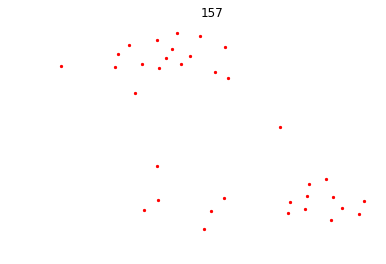

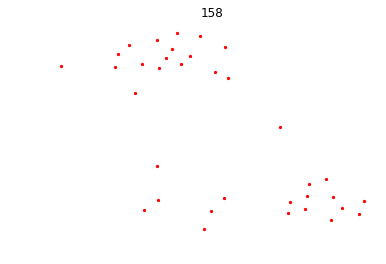

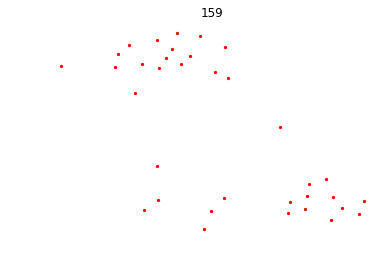

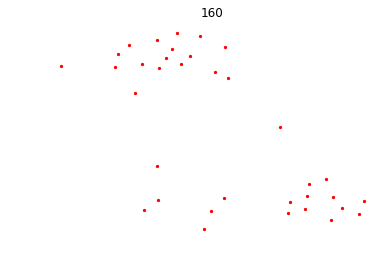

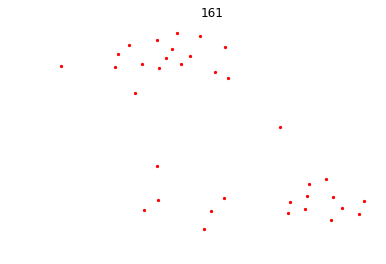

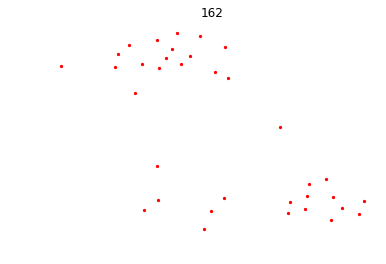

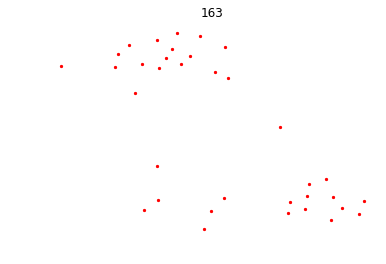

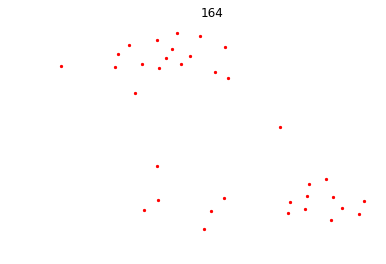

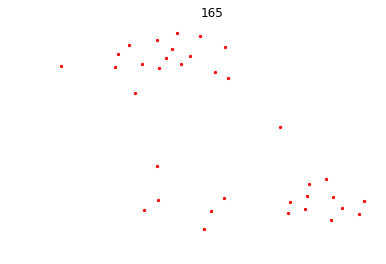

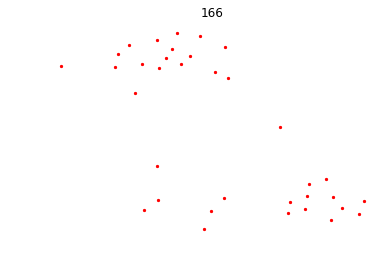

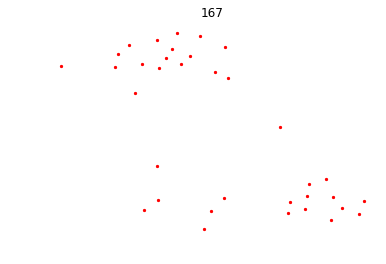

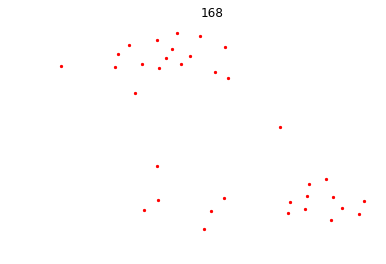

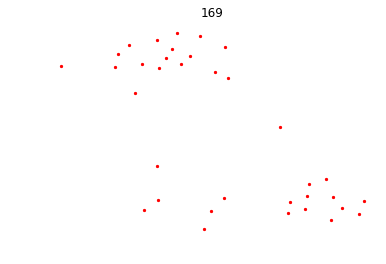

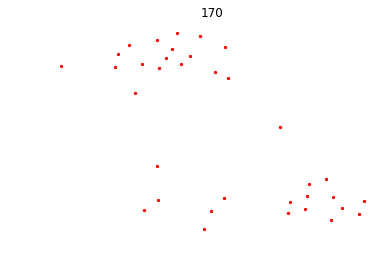

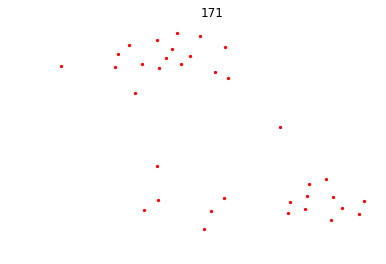

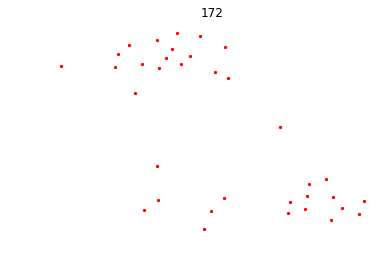

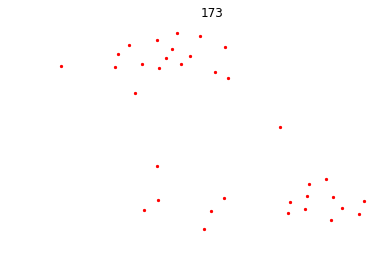

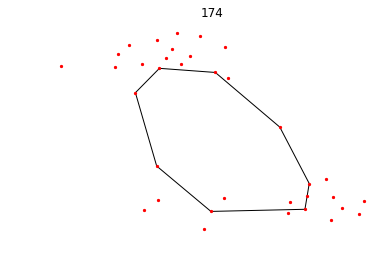

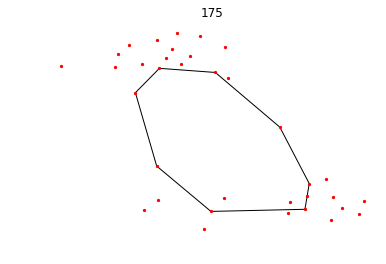

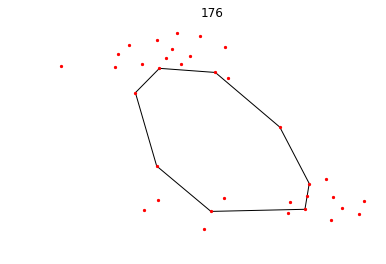

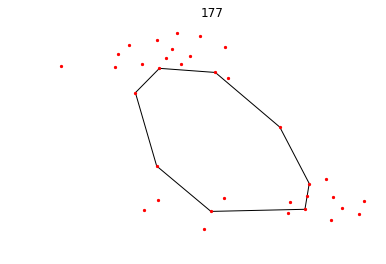

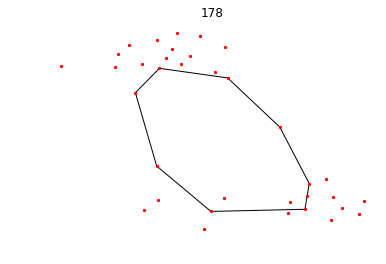

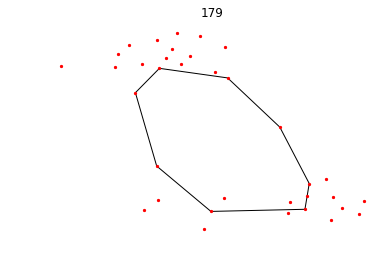

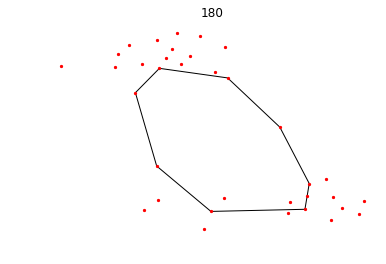

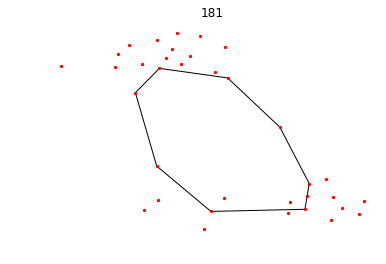

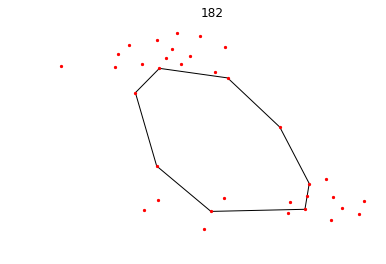

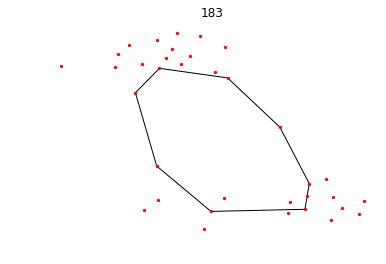

IndexError: list index out of range

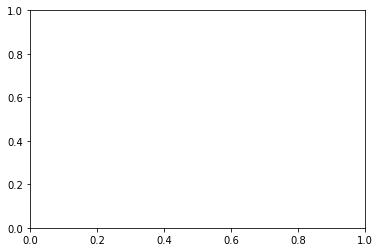

In [17]:
MM = np.zeros((35,35));
import time
for i in range(1,189):
    fig , tuma= plt.subplots()
    M = Scaffold.matrix_Basis(Bas[i] , NV , np.array(F.get_edgeList()) )
    MM+=M;
    nx.draw( nx.Graph(M) , pos = layout , node_size=5, ax=tuma )
    plt.title(i)
    #time.sleep(0.3)
    plt.show()

<a id="Draws"></a>
### Uniqueness of the Minimal Basis
667

<a id="Parallel"></a>
### Parallel computation
668

<a id="HolesDependencies"></a>
### Dependencies for Holes
Hello 666

# Now using Holes!

In [18]:
sys.path.append('./Holes/')
import Holes as ho

fil = ho.filtrations.upward_limited_weight_clique_rank_filtration(G,3)
clique_dictionary_file = './test_filtration.pck'
pk.dump(fil,open(clique_dictionary_file,'wb'), protocol=2)

hom_dim = 1 # max homology group calculated
dataset_tag = 'test_'
output_dir = './CElegans';

ho.persistent_homology_calculation(clique_dictionary_file, hom_dim, dataset_tag, output_dir,m1=512, m2=2048,save_generators=True)

Preliminary scan of edge weights to define filtration steps...
Constructing filtration...
Max filtration value: 182
Clique dictionary created.
Calling: jython  /Users/marco/Desktop/PhD/SHB/Scaffold_Release/MinScaffold/Holes/jython_utils/persistent_homology_calculation.py ./test_filtration.pck 1 ./CElegans test__ /Users/marco/javaplex/ True
0


Child returned 0


In [19]:
gen_file = './CElegansgen/generators_test__.pck'
gen = pk.load(open(gen_file, 'rb'))

ScafH = nx.Graph()
ScafH.add_nodes_from(G)

edges = []

for c in gen[1]:
    edges.extend(c.cycles())
    
for e in edges:
    u , v = int(e[0]) , int(e[1])
    if ScafH.has_edge(u,v):
        ScafH[u][v]['weight'] += 1
    else:
        ScafH.add_edge(u, v, weight=1)
        

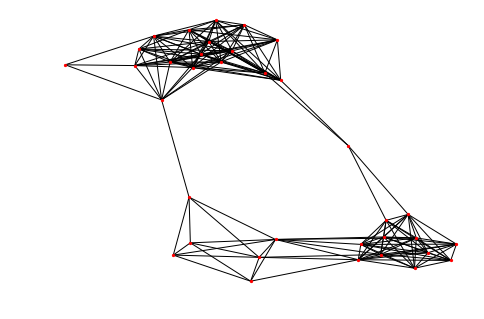

In [20]:
# layout was defined up at the beginning!
nx.draw(G, pos=layout, node_size=5)

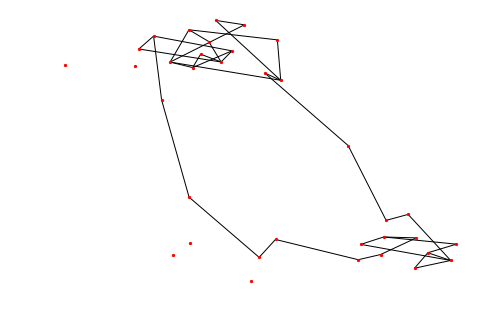

In [21]:
nx.draw(ScafH, pos=layout, node_size=5)

In [22]:
len(gen[1])

5

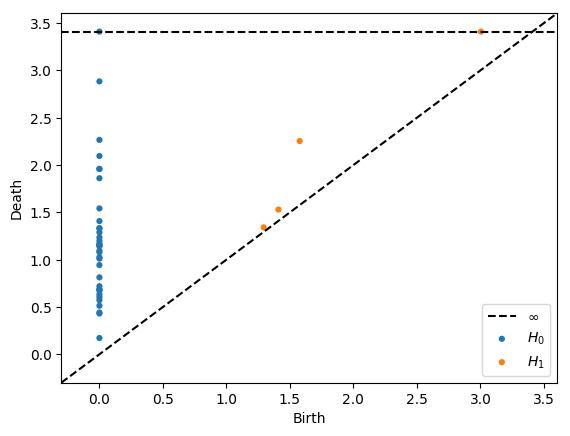

In [20]:
from ripser import ripser, plot_dgms

A = nx.adjacency_matrix(G)

diagrams = ripser(A,distance_matrix=True)['dgms']
plot_dgms(diagrams)

## Compare the two scaffolds!

Original edges: 214 - With Holes: 42 - Minimal Scaffold: 46


matrix([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0., 13.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 13.,  0.,  0.]])

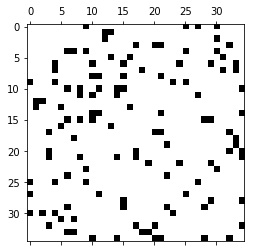

In [11]:
print( 'Original edges: ' + str(G.number_of_edges()) + ' - With Holes: ' + str(ScafH.number_of_edges()) +
      ' - Minimal Scaffold: ' + str(Scaf.number_of_edges()) )

SH = nx.adjacency_matrix(ScafH, weight='weight')
SH = np.matrix(SH.todense())
Diff = np.abs(SH - S)
plt.spy(Diff)
Diff

/home/marco/.local/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


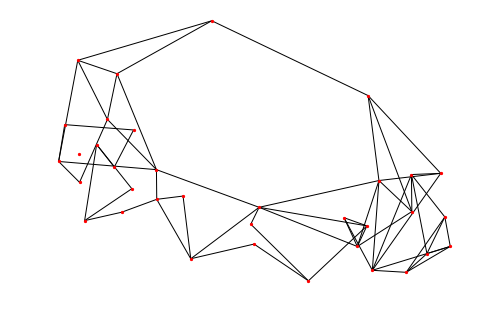

In [12]:
D = nx.Graph(Diff)
nx.draw(D , pos = layout, node_size=5)

In [13]:
ScafH.number_of_edges()

42

In [14]:
Scaf.number_of_edges()

46

/home/marco/.local/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


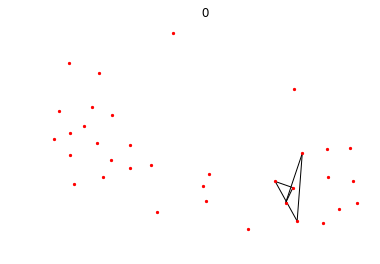

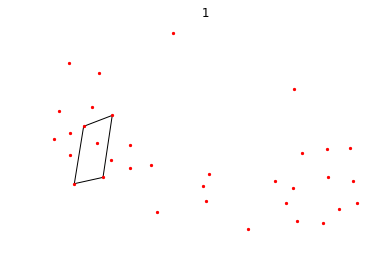

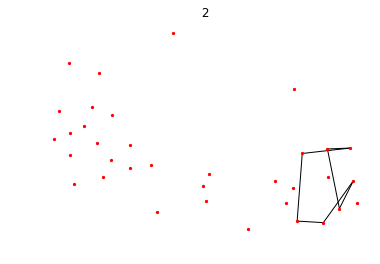

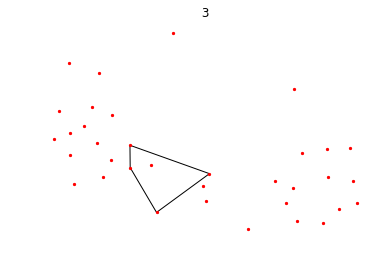

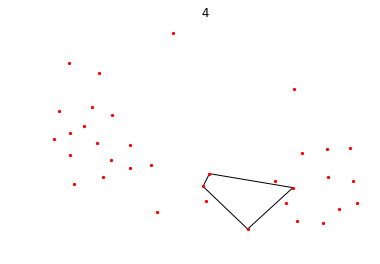

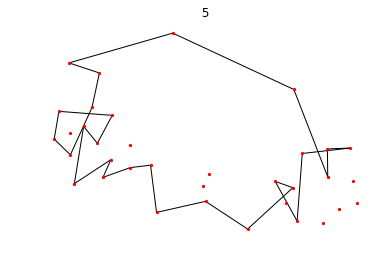

In [15]:
for i,c in enumerate(gen[1]):
    fig , tuma = plt.subplots()
    edges = c.cycles()
    SS = nx.Graph()
    SS.add_nodes_from(G)
    for e in edges:
        u , v = int(e[0]) , int(e[1])
        SS.add_edge(u, v, weight=1)
    plt.title( ' '+str(i) + ' '  )
    nx.draw(SS, pos = layout , node_size=5, ax=tuma )
    
    

## RIPSER
Let us use the "fast" persistence algorithm in ripser to obtain the barcode. We want to do so to compute the "bounds" in the filtration outside of which the $H_1$ homology is trivial. This way we can avoid useless computations of trivil homology groups

In [31]:
import ripser
import scipy

G = nx.read_weighted_edgelist('./CElegans/celegans_weighted_undirected.edges')
# converto to weighted adj matrix
W = nx.adjacency_matrix(G,weight='weight')
W = W.power(-1)

#W = np.reciprocal(W) # will complain about division by zero
#W[W==np.inf] = 0 # revert inf to zeros

#r = ripser.ripser(W,distance_matrix=True)
#ripser.plot_dgms(r['dgms'])
w = W.todense().flatten()
len(w)

1

In [36]:
# READ THE DATASET
G = nx.read_weighted_edgelist('./CElegans/celegans_weighted_undirected.edges')
# converto to weighted adj matrix
W = nx.adjacency_matrix(G,weight='weight').todense()
# weigts you need to invert
W = np.reciprocal(W) # will complain about division by zero
W[W==np.inf] = 0 # revert inf to zeros
W = np.matrix(W)
#Testing suggests it works all right

# now the heavy-lifting!
#epsList = Geometry.genFullEpsList(W) # get the filtration

vals = np.ndarray.flatten(W)
vals = vals.tolist()
while type(vals[0]) is not float:
    vals = vals[0]
#print(vals)
vals = np.unique(vals).tolist()
#vals.tolist()
print(vals)


# vals = list(set(vals))
# vals = sorted(vals)
# vals = [ x + 0.001 for x in vals ]


[0.0, 0.014285714285714285, 0.01639344262295082, 0.022727272727272728, 0.03225806451612903, 0.03333333333333333, 0.034482758620689655, 0.03571428571428571, 0.037037037037037035, 0.04, 0.041666666666666664, 0.043478260869565216, 0.045454545454545456, 0.05263157894736842, 0.05555555555555555, 0.058823529411764705, 0.0625, 0.06666666666666667, 0.07142857142857142, 0.07692307692307693, 0.08333333333333333, 0.09090909090909091, 0.1, 0.1111111111111111, 0.125, 0.14285714285714285, 0.16666666666666666, 0.2, 0.25, 0.3333333333333333, 0.5, 1.0]


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in reciprocal
  


In [21]:
data = np.load('CElegans/CEFullNoDraws.dat')
data[7]['SHB']

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [8]:
import scipy.stats

scipy.stats.spearmanr

function

In [3]:
G = nx.read_weighted_edgelist('./CElegans/celegans_weighted_undirected.edges')

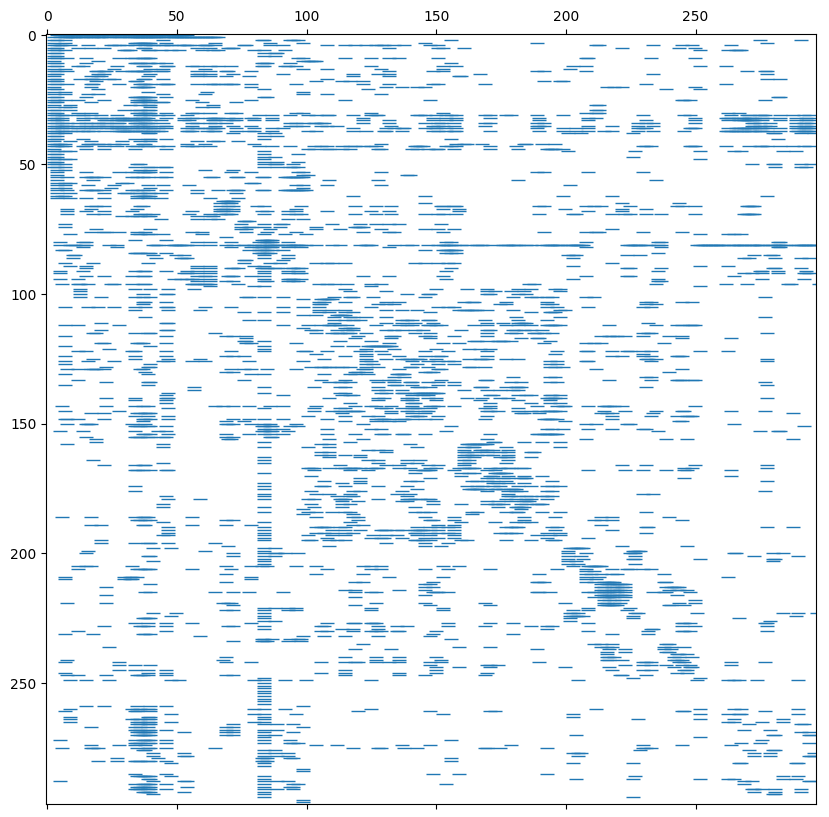

In [15]:
A = nx.adjacency_matrix(G)

#A = np.reciprocal(A) # will complain about division by zero
#A[A==np.inf] = 0 # revert inf to zeros

plt.figure(figsize=(10,10))
plt.spy(A,marker=True, antialiased=True)

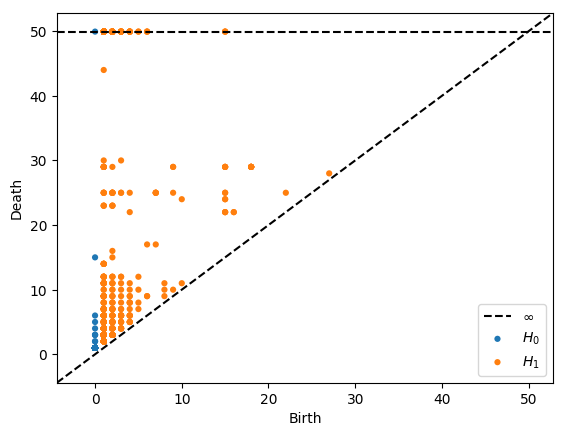

In [16]:
from ripser import ripser, plot_dgms

diagrams = ripser(A,distance_matrix=True)['dgms']
plot_dgms(diagrams)